# Initial codes

This notebook illustrates how Bayesian inference can be used to infer response rates of each group (basket) in a Basket trial.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSite
from pyBasket.common import DEFAULT_DECISION_THRESHOLD, DEFAULT_DECISION_THRESHOLD_INTERIM
from pyBasket.common import MODEL_INDEPENDENT, MODEL_INDEPENDENT_BERN, MODEL_BHM, MODEL_PYBASKET

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 4

## Example 1: treatment is of interest in all groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 1).

4 groups are present in the trial, and all group response rates to the treatment are the same (0.3). The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The first example is a scenario in which responses are simulated assuming p = 30% in all four groups. This example illustrates the effect of borrowing across groups when all groups are similar, such as the smoothing of the observed response rates and a reduction in uncertainty.

### Generate data

In [8]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p1, p1, p1, p1]
enrollments = [[10, 5, 5, 5, 5, 5] for _ in range(K)]
site = TrueResponseSite(true_response_rates, enrollments)

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [9]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = True

In [10]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-24 18:15:25.075 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-24 18:15:25.077 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 5/10 for Analysis independent
2023-06-24 18:15:25.077 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 5/10 for Analysis BHM
2023-06-24 18:15:25.077 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 3/10 for Analysis independent
2023-06-24 18:15:25.078 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 3/10 for Analysis BHM
2023-06-24 18:15:25.078 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 2/10 for Analysis independent
2023-06-24 18:15:25.078 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 2/10 for Analysis BHM
2023-06-24 18:15:25.079 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 1/10 for Analysis independent
2023-06-24 18:15:25.079 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 1/10 for 

### Check last results

### Simple

In [11]:
analysis_name = analysis_names[0]
analysis_name

'independent'

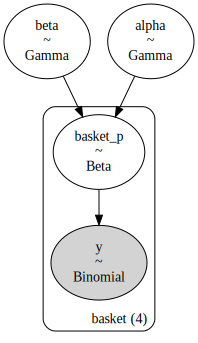

In [12]:
trial.visualise_model(analysis_name)

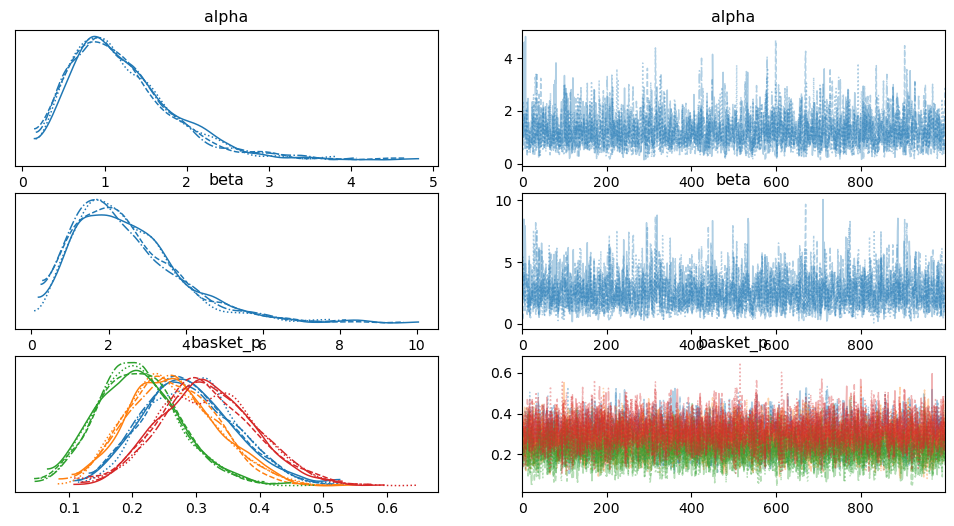

In [13]:
trial.plot_trace(analysis_name, -1)

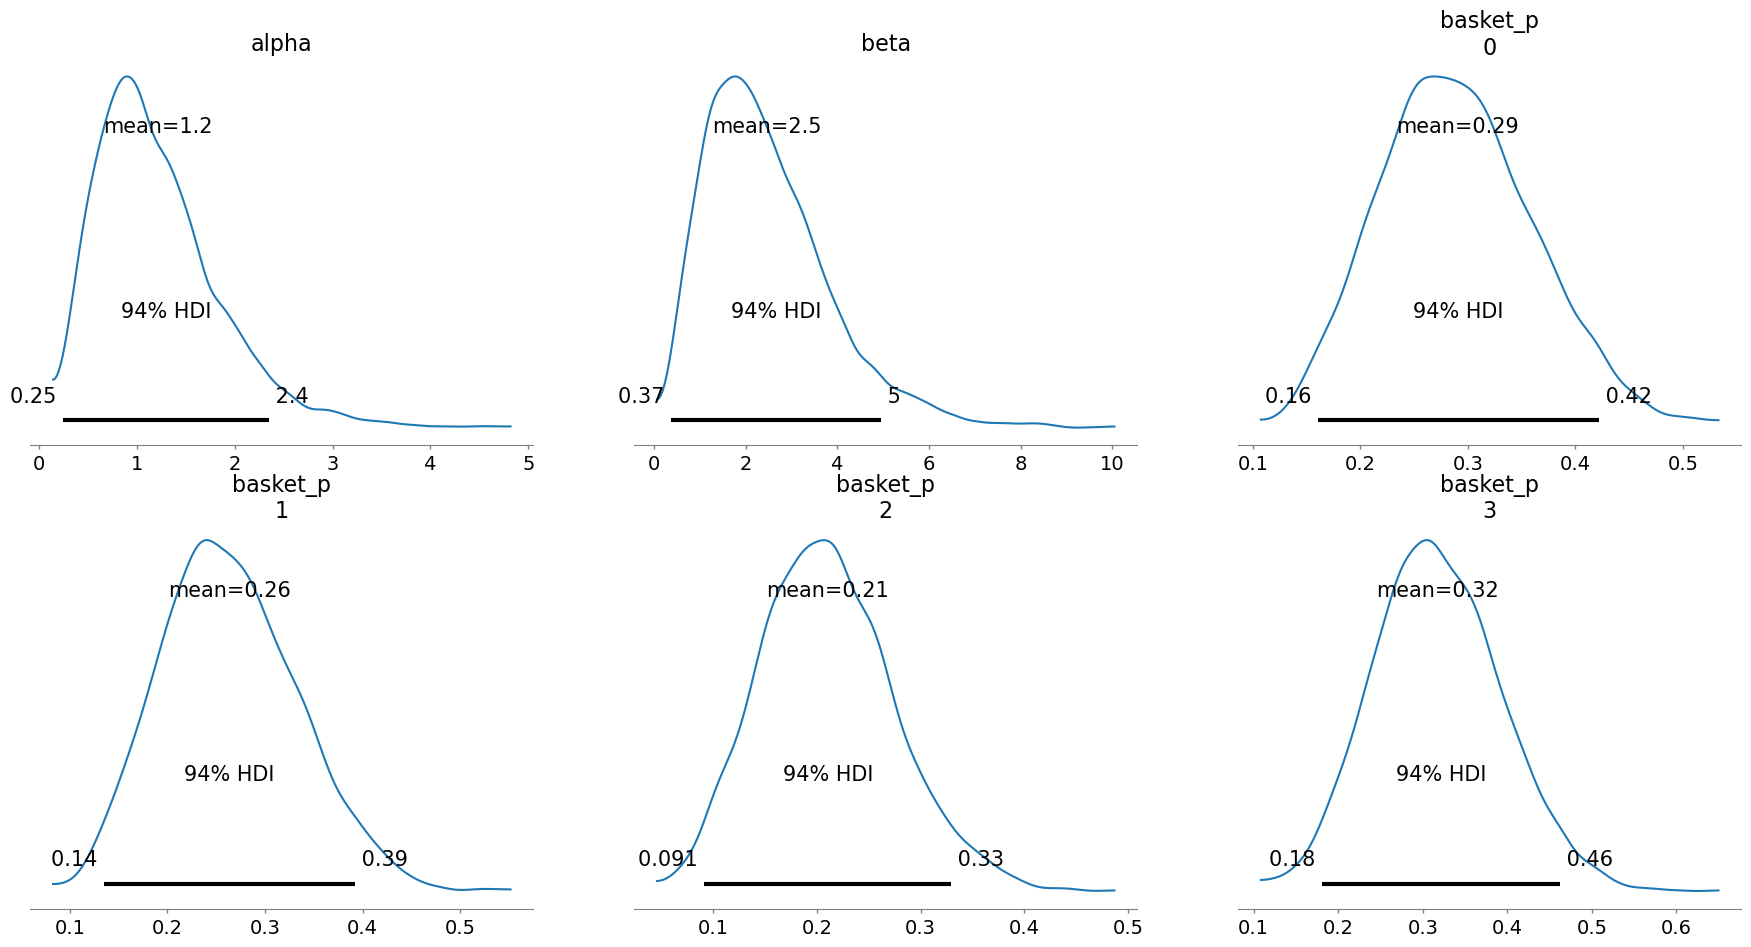

In [14]:
trial.plot_posterior(analysis_name, -1)

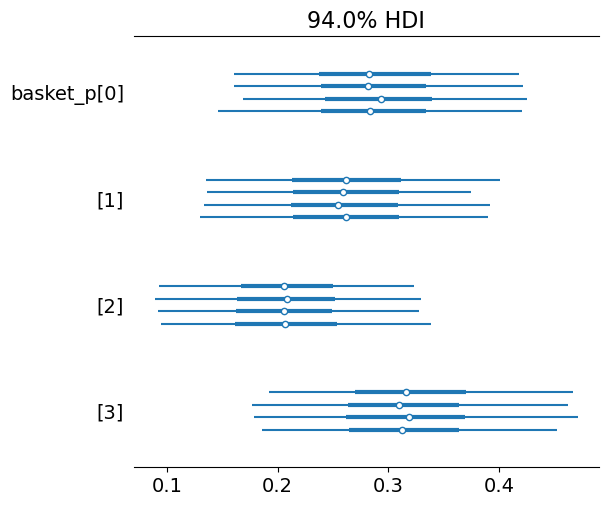

In [15]:
trial.plot_forest(analysis_name, -1)

In [16]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.98150,0.05,True,OPEN,5,10
1,0.78600,0.05,True,OPEN,3,10
2,0.56625,0.05,True,OPEN,2,10
3,0.27125,0.05,True,OPEN,1,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.88725,0.05,True,OPEN,5,15
1,0.55675,0.05,True,OPEN,3,15
2,0.88825,0.05,True,OPEN,5,15
3,0.32200,0.05,True,OPEN,2,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.85050,0.05,True,OPEN,6,20
1,0.53475,0.05,True,OPEN,4,20
2,0.74350,0.05,True,OPEN,5,20
3,0.32625,0.05,True,OPEN,3,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.99075,0.05,True,OPEN,10,25
1,0.71875,0.05,True,OPEN,6,25
2,0.56125,0.05,True,OPEN,5,25
3,0.84625,0.05,True,OPEN,7,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.96275,0.05,True,OPEN,10,30
1,0.82600,0.05,True,OPEN,8,30
2,0.36575,0.05,True,OPEN,5,30
3,0.90675,0.05,True,OPEN,9,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.00000,0.9,True,COMPLETED_EFFECTIVE,10,35
1,0.99825,0.9,True,COMPLETED_EFFECTIVE,9,35
2,0.96700,0.9,True,COMPLETED_EFFECTIVE,7,35
3,1.00000,0.9,True,COMPLETED_EFFECTIVE,11,35


In [17]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.00000,0.9,True,COMPLETED_EFFECTIVE,10,35
1,0.99825,0.9,True,COMPLETED_EFFECTIVE,9,35
2,0.96700,0.9,True,COMPLETED_EFFECTIVE,7,35
3,1.00000,0.9,True,COMPLETED_EFFECTIVE,11,35


### BHM

In [18]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

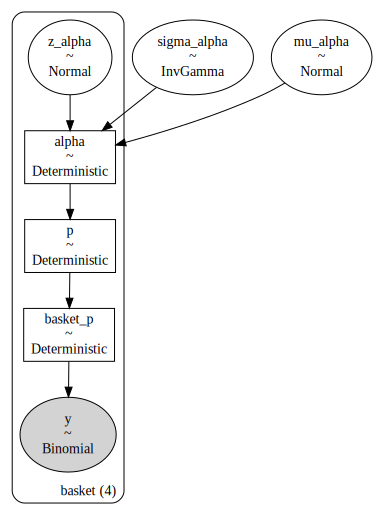

In [19]:
trial.visualise_model(analysis_name)

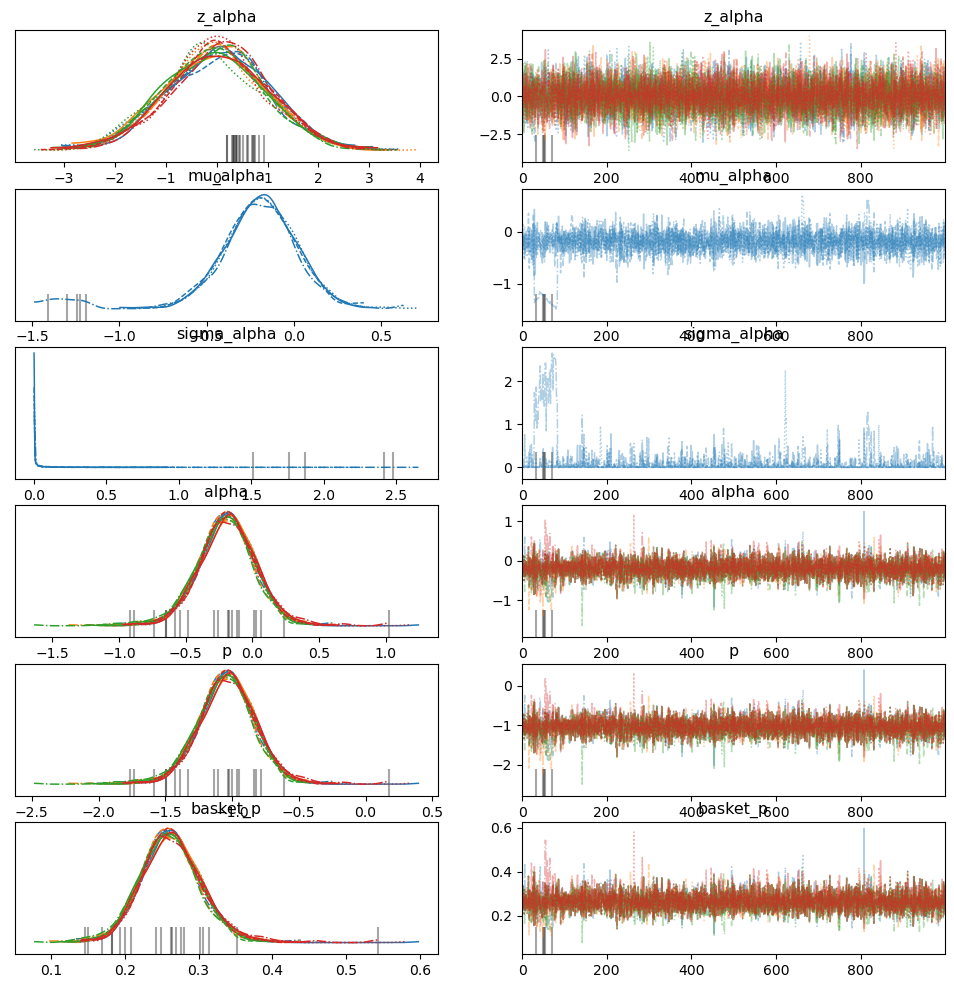

In [20]:
trial.plot_trace(analysis_name, -1)

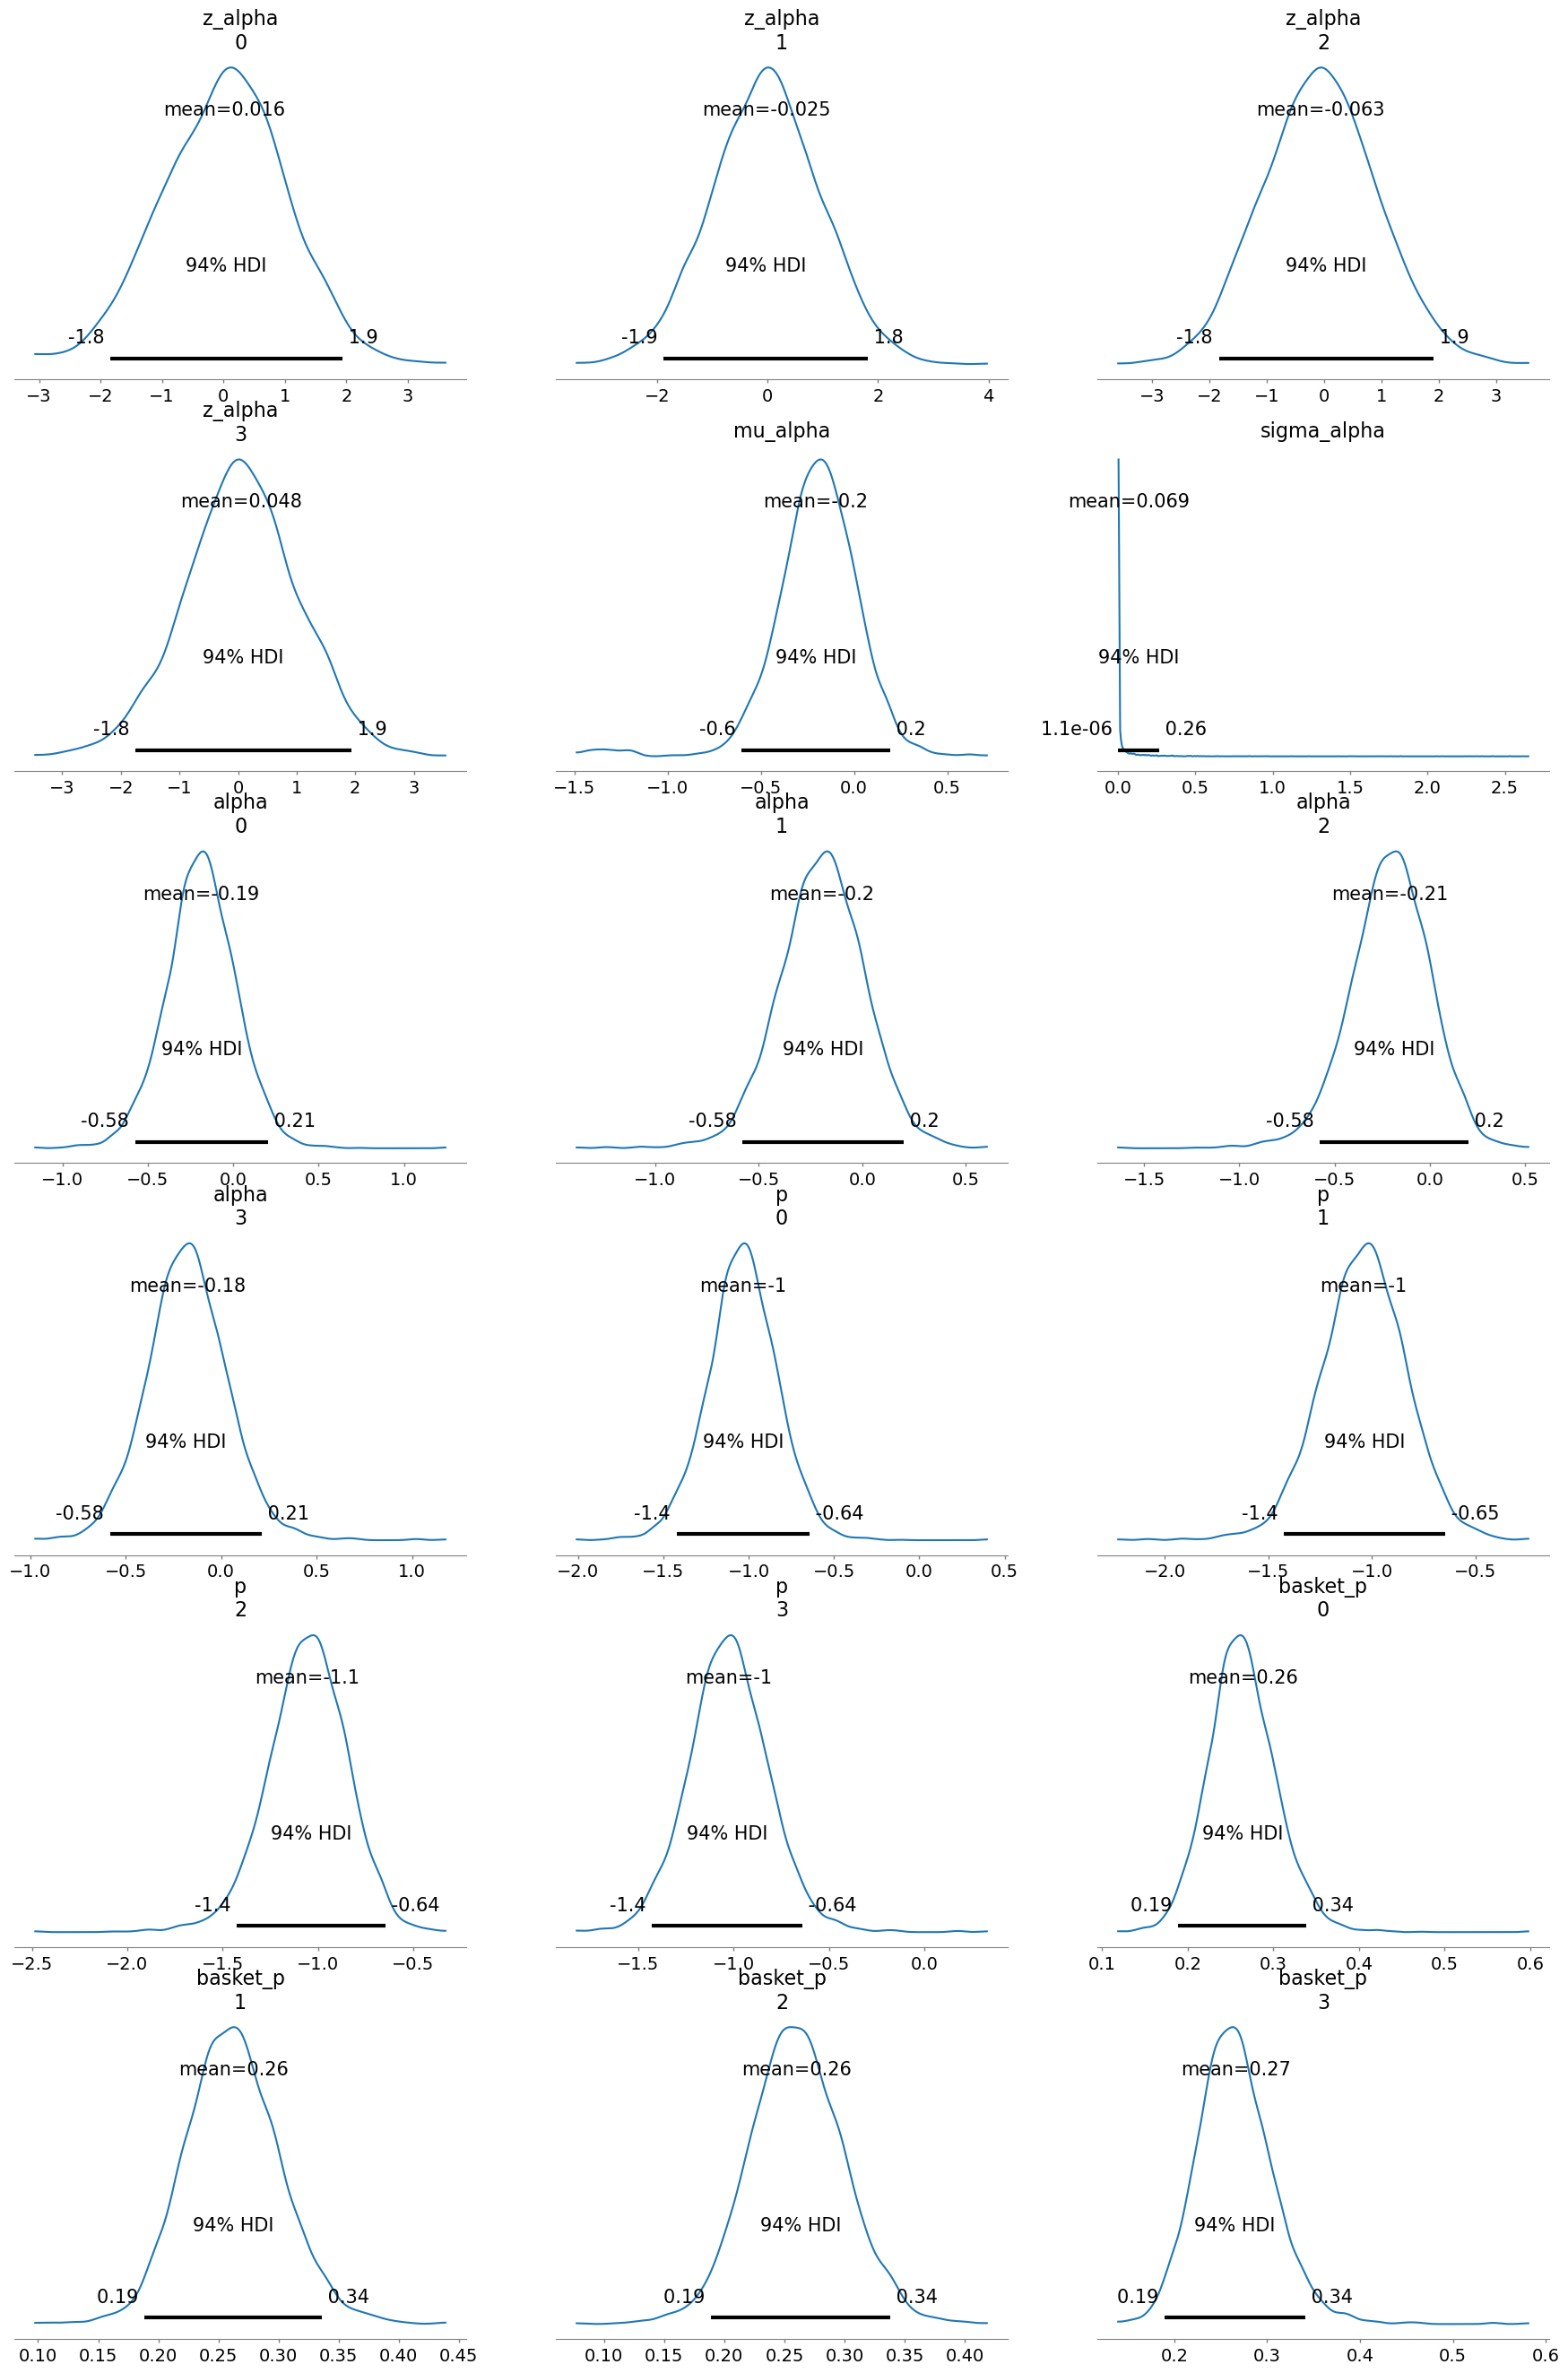

In [21]:
trial.plot_posterior(analysis_name, -1)

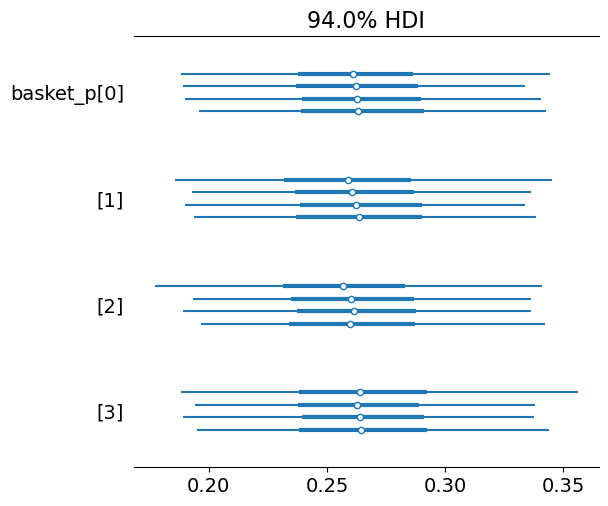

In [22]:
trial.plot_forest(analysis_name, -1)

In [23]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.88300,0.05,True,OPEN,5,10
1,0.85825,0.05,True,OPEN,3,10
2,0.82900,0.05,True,OPEN,2,10
3,0.80375,0.05,True,OPEN,1,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.82050,0.05,True,OPEN,5,15
1,0.78975,0.05,True,OPEN,3,15
2,0.81950,0.05,True,OPEN,5,15
3,0.77950,0.05,True,OPEN,2,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.70275,0.05,True,OPEN,6,20
1,0.67225,0.05,True,OPEN,4,20
2,0.68875,0.05,True,OPEN,5,20
3,0.66375,0.05,True,OPEN,3,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.97375,0.05,True,OPEN,10,25
1,0.95500,0.05,True,OPEN,6,25
2,0.94875,0.05,True,OPEN,5,25
3,0.96150,0.05,True,OPEN,7,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.95125,0.05,True,OPEN,10,30
1,0.94575,0.05,True,OPEN,8,30
2,0.91800,0.05,True,OPEN,5,30
3,0.95025,0.05,True,OPEN,9,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.00000,0.9,True,COMPLETED_EFFECTIVE,10,35
1,0.99975,0.9,True,COMPLETED_EFFECTIVE,9,35
2,0.99975,0.9,True,COMPLETED_EFFECTIVE,7,35
3,1.00000,0.9,True,COMPLETED_EFFECTIVE,11,35


In [24]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,1.00000,0.9,True,COMPLETED_EFFECTIVE,10,35
1,0.99975,0.9,True,COMPLETED_EFFECTIVE,9,35
2,0.99975,0.9,True,COMPLETED_EFFECTIVE,7,35
3,1.00000,0.9,True,COMPLETED_EFFECTIVE,11,35


## Example 2: treatment is of interest in only two groups

Same example as in [Berry et al. 2013](https://journals.sagepub.com/doi/full/10.1177/1740774513497539) (Figure 2).

4 groups are present in the group, with first two group responses = 0.10 and the other two groups = 0.3. The trial enrolls patients in 6 stages, first taking 10 patient for each group in the first stage, followed by 5 patients for each group in latter stages.

> The second example is from a scenario in which responses are simulated assuming p = 10% in two groups and p = 30% in two groups. This example illustrates the effect of borrowing, and that the harm is not great, when groups are dissimilar.

### Generate data

In [25]:
K = 4    # the number of groups
p0 = 0.1 # null response rate
p1 = 0.3 # target response rate

true_response_rates = [p0, p0, p1, p1]
enrollments = [[10, 5, 5, 5, 5, 5] for _ in range(K)]
site = TrueResponseSite(true_response_rates, enrollments)

evaluate_interim = [True, True, True, True, True, True] # evaluate every interim stage
analysis_names = [MODEL_INDEPENDENT, MODEL_BHM]

In [26]:
dt = DEFAULT_DECISION_THRESHOLD
dt_interim = DEFAULT_DECISION_THRESHOLD_INTERIM
early_futility_stop = True

In [27]:
trial = Trial(K, p0, p1, site, evaluate_interim, 
              num_burn_in, num_posterior_samples, analysis_names, 
              dt=dt, dt_interim=dt_interim,
              early_futility_stop=early_futility_stop,
              num_chains=num_chains)

done = trial.reset()
while not done:
    done = trial.step()

2023-06-24 18:31:20.189 | DEBUG    | pyBasket.env:step:241 - 
########## Stage=0 ##########

2023-06-24 18:31:20.197 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 1/10 for Analysis independent
2023-06-24 18:31:20.203 | DEBUG    | pyBasket.env:step:254 - Registering Group 0 (OPEN): 1/10 for Analysis BHM
2023-06-24 18:31:20.209 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 1/10 for Analysis independent
2023-06-24 18:31:20.220 | DEBUG    | pyBasket.env:step:254 - Registering Group 1 (OPEN): 1/10 for Analysis BHM
2023-06-24 18:31:20.222 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 5/10 for Analysis independent
2023-06-24 18:31:20.228 | DEBUG    | pyBasket.env:step:254 - Registering Group 2 (OPEN): 5/10 for Analysis BHM
2023-06-24 18:31:20.229 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/10 for Analysis independent
2023-06-24 18:31:20.231 | DEBUG    | pyBasket.env:step:254 - Registering Group 3 (OPEN): 3/10 for 

### Check last results

### Simple

In [28]:
analysis_name = analysis_names[0]
analysis_name

'independent'

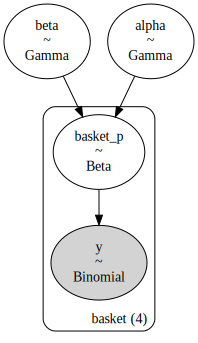

In [29]:
trial.visualise_model(analysis_name)

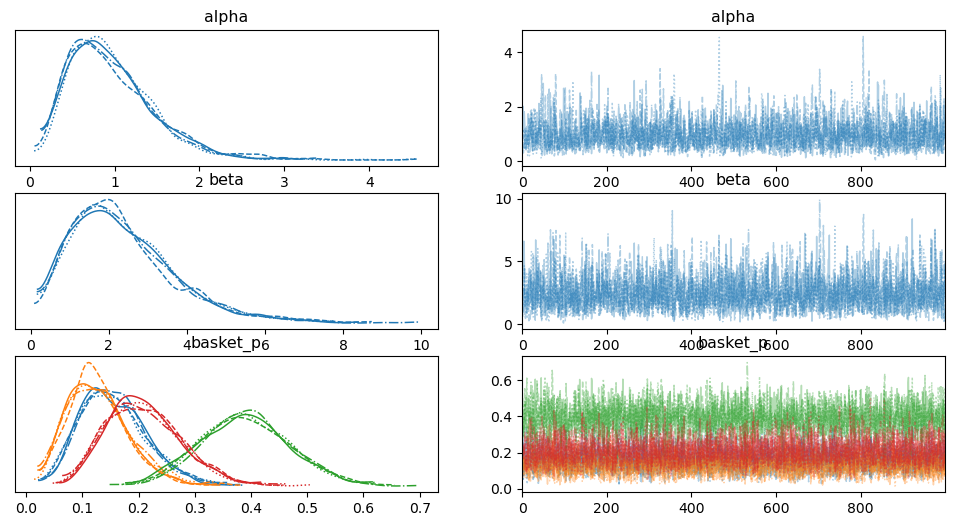

In [30]:
trial.plot_trace(analysis_name, -1)

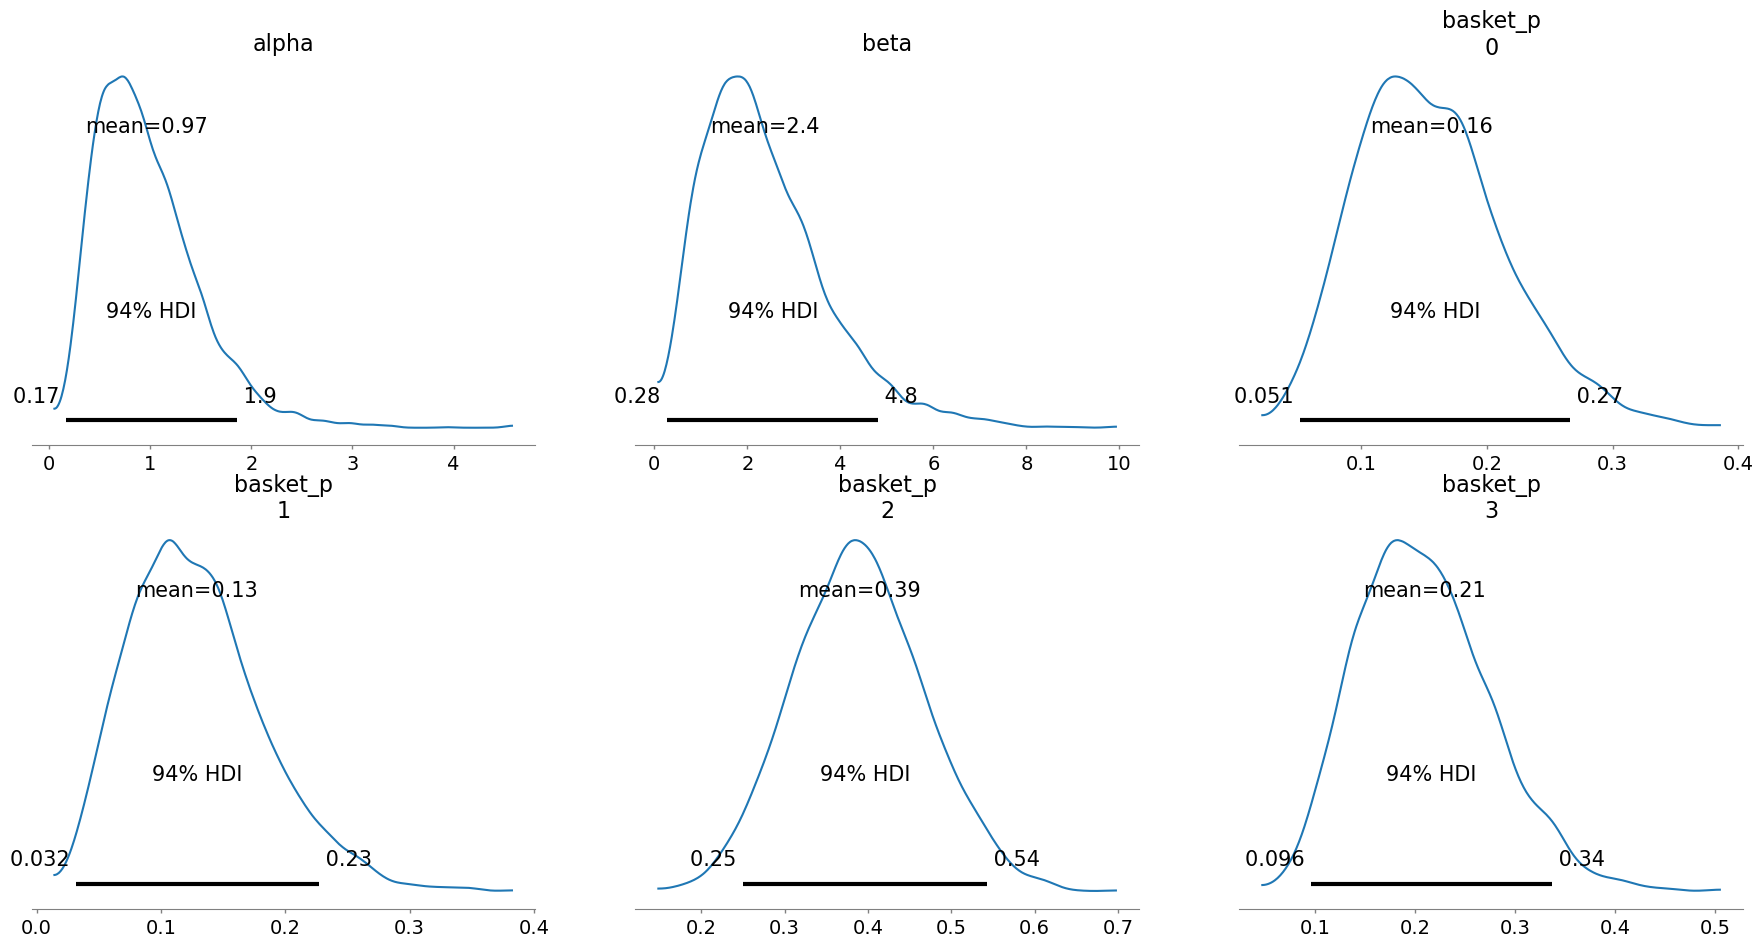

In [31]:
trial.plot_posterior(analysis_name, -1)

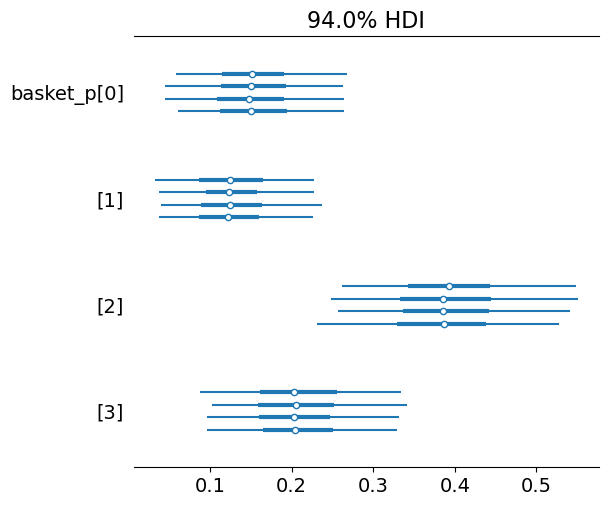

In [32]:
trial.plot_forest(analysis_name, -1)

In [33]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.26725,0.05,True,OPEN,1,10
1,0.26600,0.05,True,OPEN,1,10
2,0.97900,0.05,True,OPEN,5,10
3,0.77025,0.05,True,OPEN,3,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.10425,0.05,True,OPEN,1,15
1,0.29850,0.05,True,OPEN,2,15
2,0.95650,0.05,True,OPEN,6,15
3,0.71350,0.05,True,OPEN,4,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.31850,0.05,True,OPEN,3,20
1,0.15350,0.05,True,OPEN,2,20
2,0.99925,0.05,True,OPEN,10,20
3,0.51825,0.05,True,OPEN,4,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.16350,0.05,True,OPEN,3,25
1,0.16750,0.05,True,OPEN,3,25
2,0.99475,0.05,True,OPEN,11,25
3,0.31600,0.05,True,OPEN,4,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.08675,0.05,True,OPEN,3,30
1,0.18850,0.05,True,OPEN,4,30
2,0.97675,0.05,True,OPEN,11,30
3,0.51300,0.05,True,OPEN,6,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.82650,0.9,False,COMPLETED_INEFFECTIVE,5,35
1,0.67475,0.9,False,COMPLETED_INEFFECTIVE,4,35
2,1.00000,0.9,True,COMPLETED_EFFECTIVE,14,35
3,0.97375,0.9,True,COMPLETED_EFFECTIVE,7,35


In [34]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.82650,0.9,False,COMPLETED_INEFFECTIVE,5,35
1,0.67475,0.9,False,COMPLETED_INEFFECTIVE,4,35
2,1.00000,0.9,True,COMPLETED_EFFECTIVE,14,35
3,0.97375,0.9,True,COMPLETED_EFFECTIVE,7,35


### BHM

In [35]:
analysis_name = analysis_names[1]
analysis_name

'BHM'

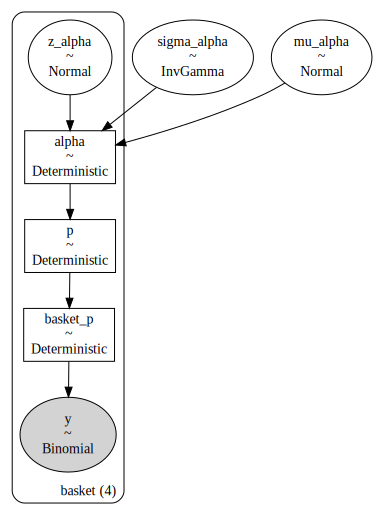

In [36]:
trial.visualise_model(analysis_name)

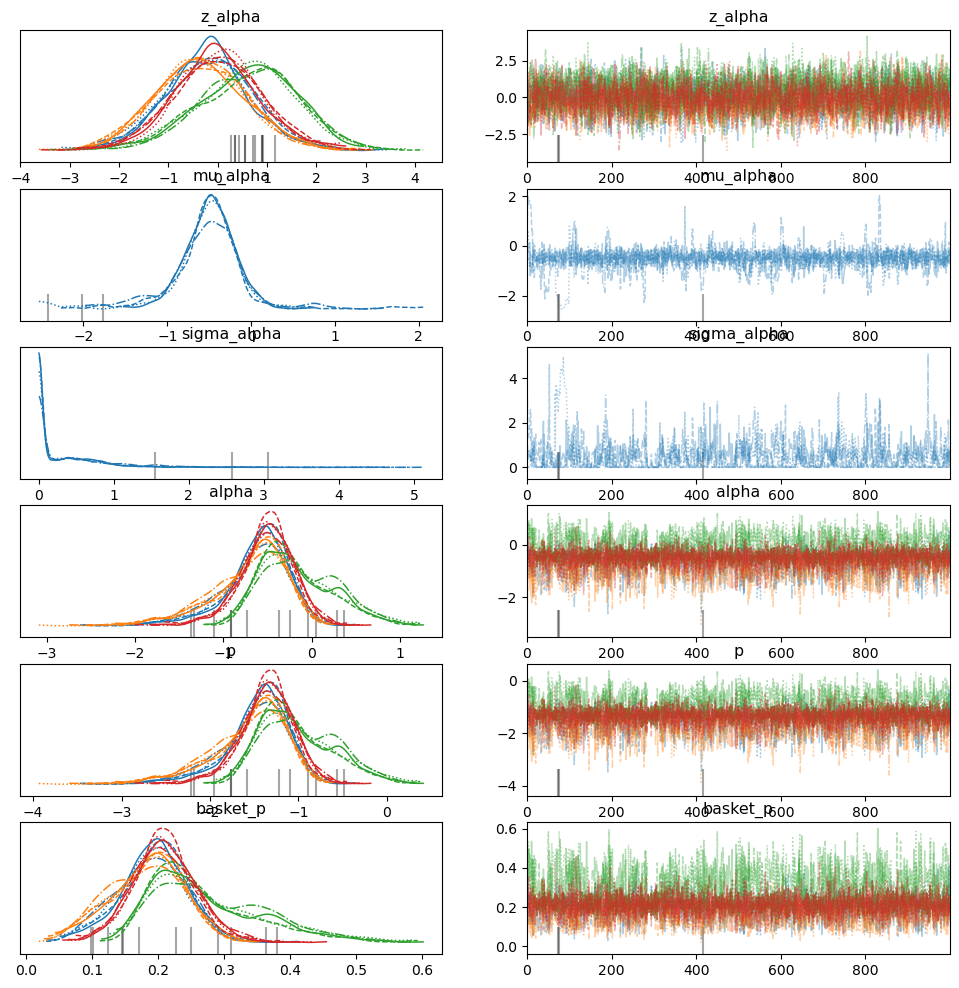

In [37]:
trial.plot_trace(analysis_name, -1)

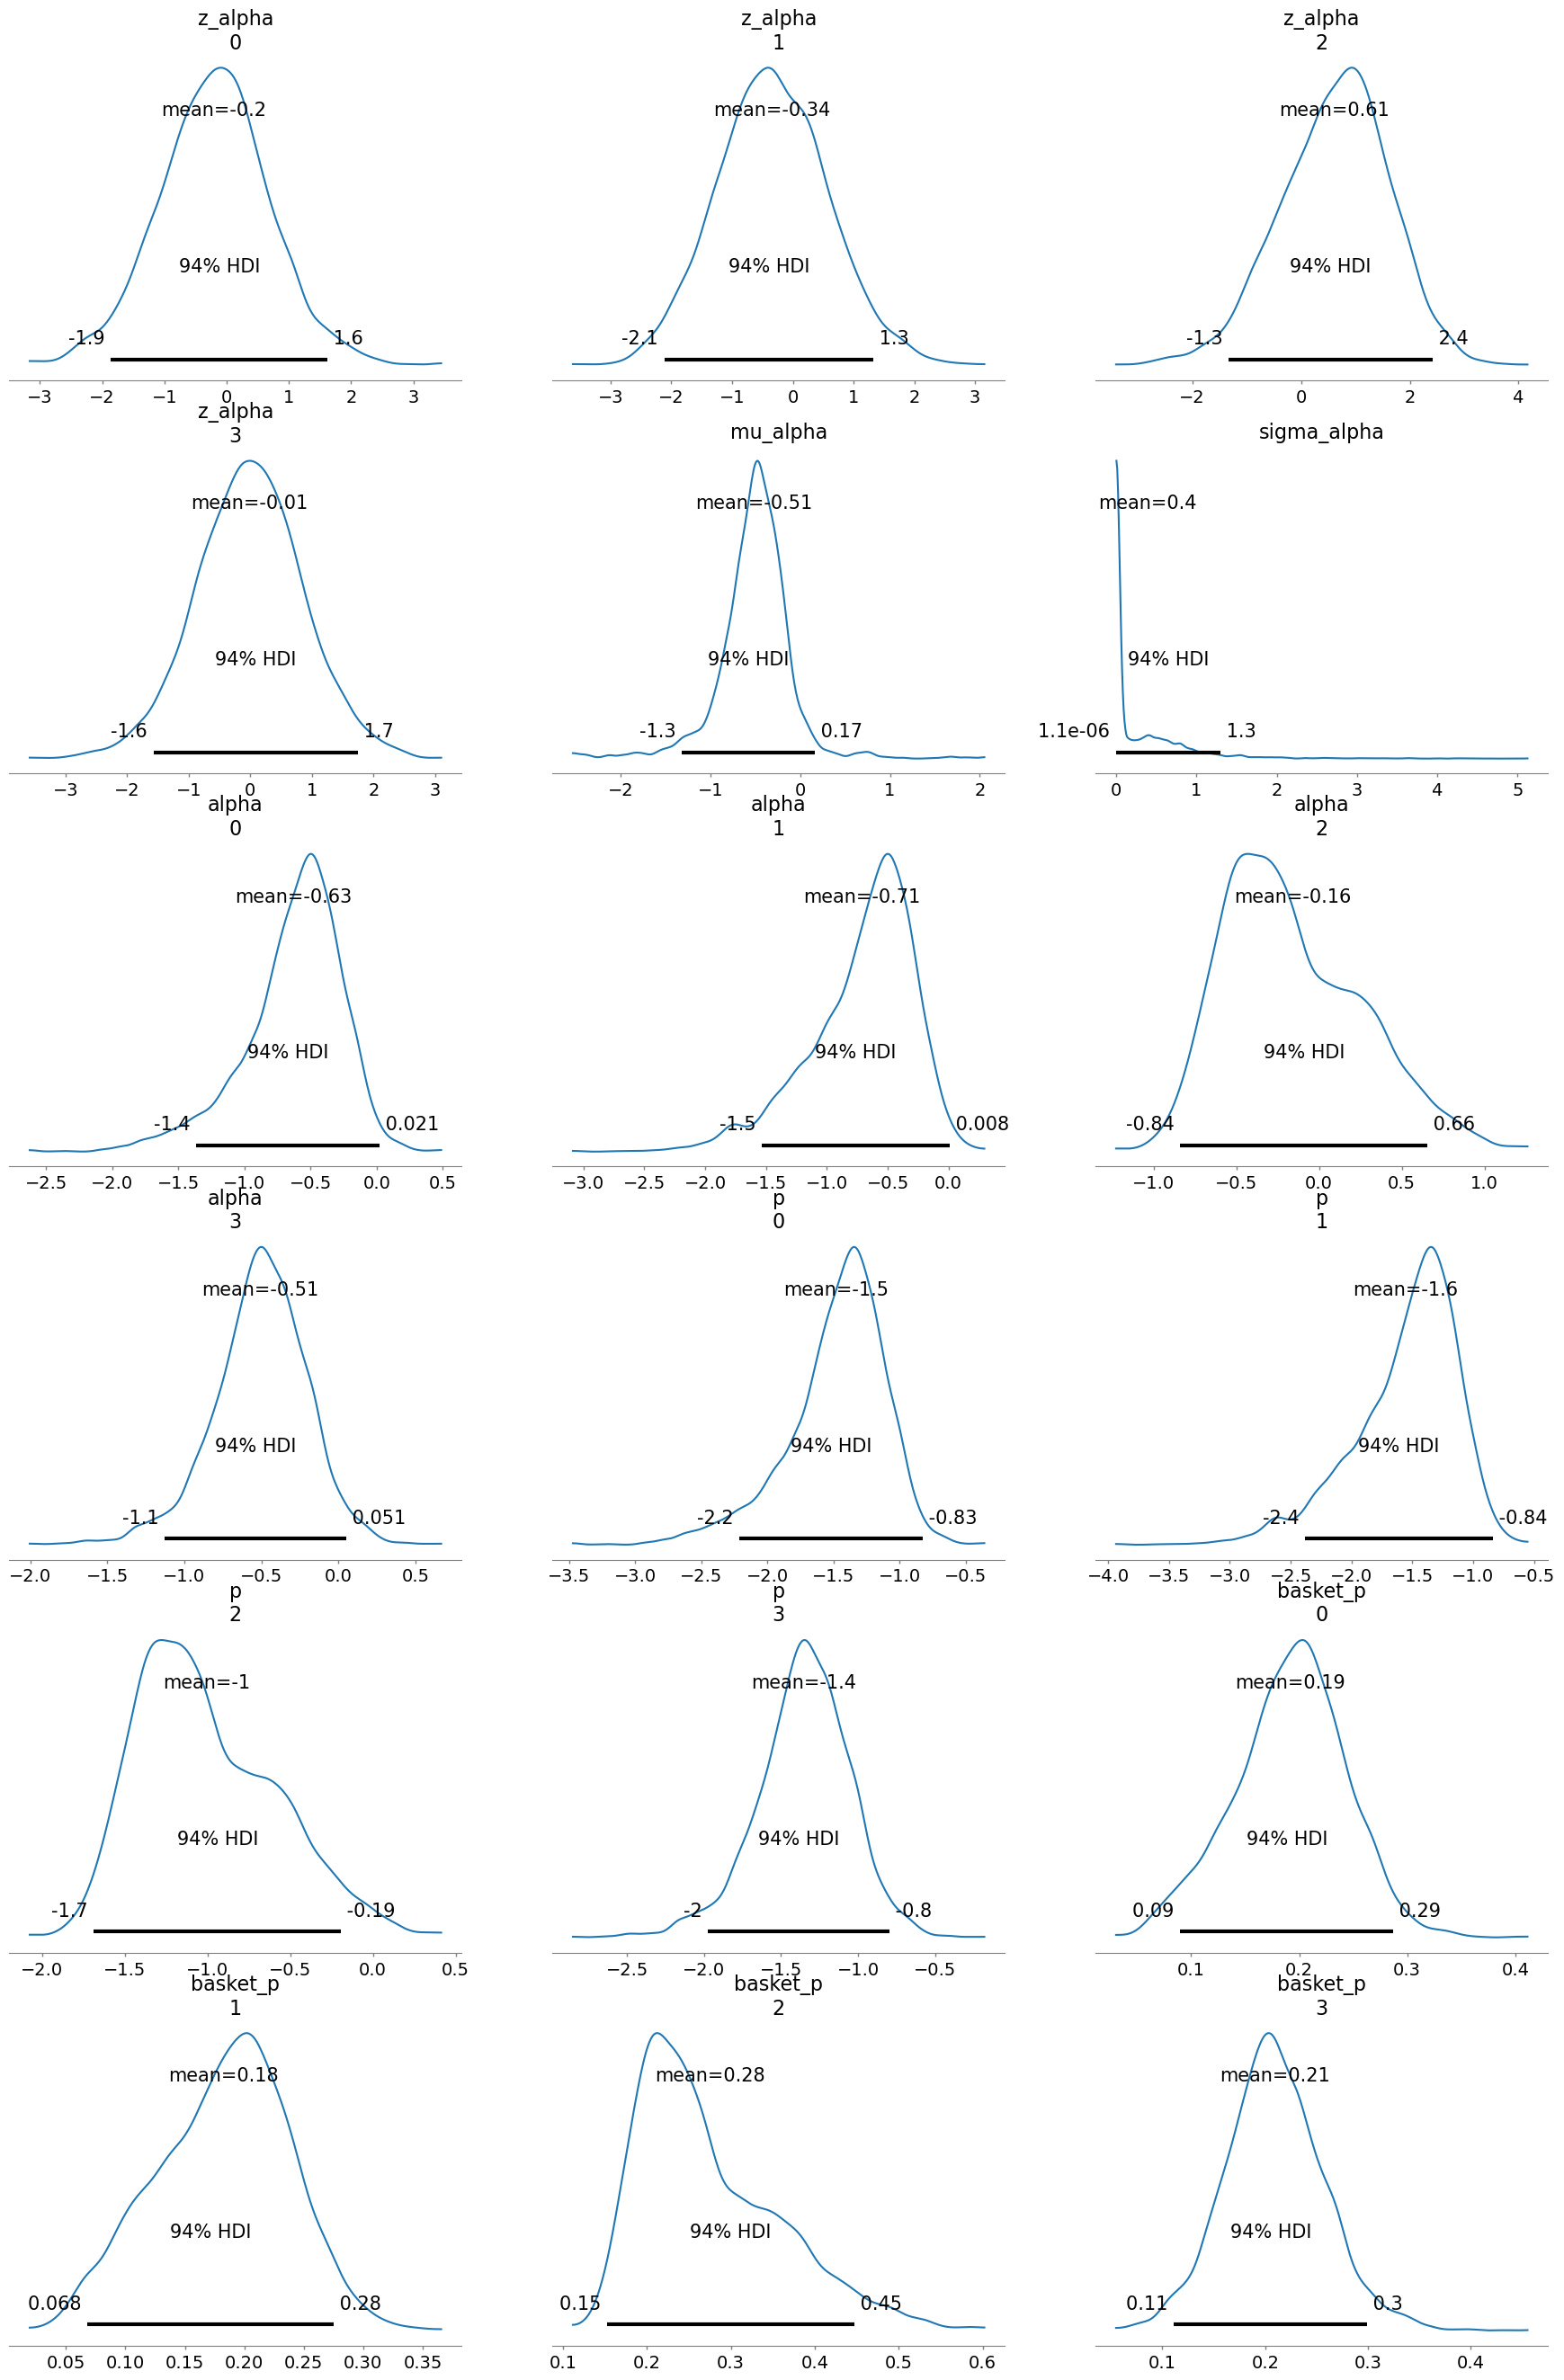

In [38]:
trial.plot_posterior(analysis_name, -1)

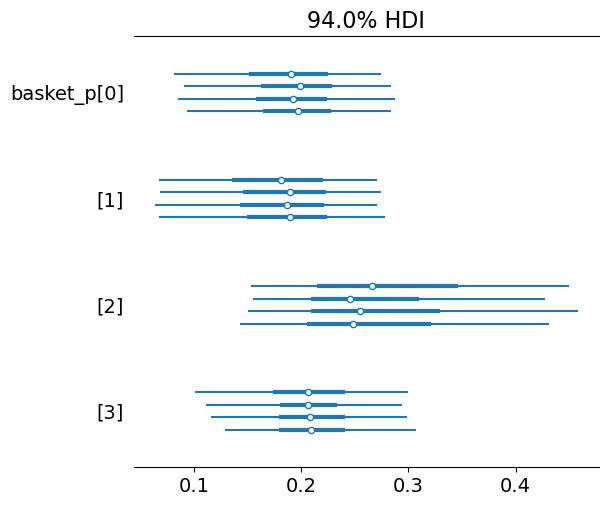

In [39]:
trial.plot_forest(analysis_name, -1)

In [40]:
trial.interim_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.65950,0.05,True,OPEN,1,10
1,0.66225,0.05,True,OPEN,1,10
2,0.81700,0.05,True,OPEN,5,10
3,0.76200,0.05,True,OPEN,3,10


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.52025,0.05,True,OPEN,1,15
1,0.55050,0.05,True,OPEN,2,15
2,0.66875,0.05,True,OPEN,6,15
3,0.61175,0.05,True,OPEN,4,15


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.55450,0.05,True,OPEN,3,20
1,0.47250,0.05,True,OPEN,2,20
2,0.90700,0.05,True,OPEN,10,20
3,0.64475,0.05,True,OPEN,4,20


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.38125,0.05,True,OPEN,3,25
1,0.38725,0.05,True,OPEN,3,25
2,0.77700,0.05,True,OPEN,11,25
3,0.43700,0.05,True,OPEN,4,25


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.38025,0.05,True,OPEN,3,30
1,0.40750,0.05,True,OPEN,4,30
2,0.61850,0.05,True,OPEN,11,30
3,0.47475,0.05,True,OPEN,6,30


,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.94775,0.9,True,COMPLETED_EFFECTIVE,5,35
1,0.91025,0.9,True,COMPLETED_EFFECTIVE,4,35
2,1.00000,0.9,True,COMPLETED_EFFECTIVE,14,35
3,0.99050,0.9,True,COMPLETED_EFFECTIVE,7,35


In [41]:
trial.final_report(analysis_name)

,prob,Q,effective,group_status,group_nnz,group_total
k,,,,,,
0,0.94775,0.9,True,COMPLETED_EFFECTIVE,5,35
1,0.91025,0.9,True,COMPLETED_EFFECTIVE,4,35
2,1.00000,0.9,True,COMPLETED_EFFECTIVE,14,35
3,0.99050,0.9,True,COMPLETED_EFFECTIVE,7,35
